mu_max = 136.24955483547032 mu_0
mu_a = 61.200263232049764 mu_0


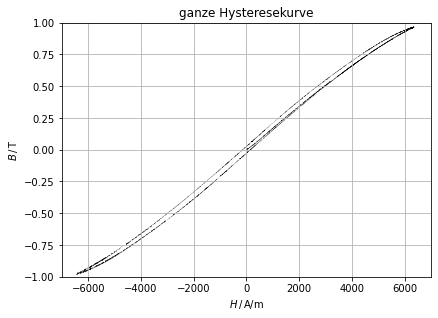

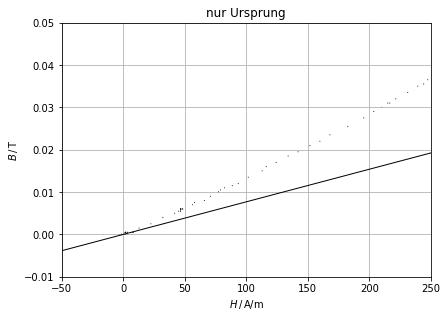

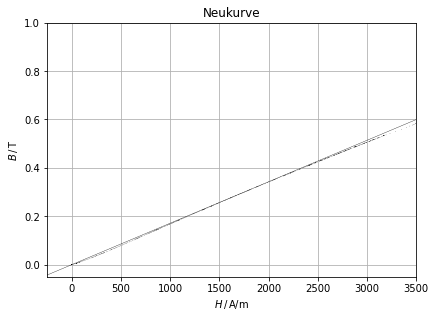

In [3]:
import numpy as np
import matplotlib.pyplot as plt

t = []
I = []
B = []

with open("Jan-de-Haan_Versuch-420.txt", ) as f:
    for i in range(0, 5):
        next(f)
    for line in f:
        cells = line.strip().split()
        t.append(float(cells[0].replace(",", ".")))
        I.append(float(cells[1].replace(",", ".")))
        B.append(float(cells[2].replace(",", ".")))

t = np.array(t)
I = -np.array(I)
B = np.array(B) / 1e3

N = 500
l_Fe = 477e-3
delta_l_Fe = 4e-3
d = 2e-3
delta_d = 0.05e-3
mu_0 = 4 * np.pi * 1e-7
delta_I = np.zeros(len(I)) + 0.01
delta_B = np.zeros(len(B)) + 5e-3

H = -(N * I / l_Fe - (d / (mu_0 * l_Fe)) * B)
delta_H = np.sqrt((N / l_Fe * delta_I)**2 + ((N * I - d / mu_0 * B) / l_Fe**2 * delta_l_Fe)**2 + (delta_d / (mu_0 * l_Fe) * B)**2 + (d / (mu_0 * l_Fe) * delta_B)**2)

f = (t > 20) & (t < 75) & (H > 0)
slope = B[f] / H[f]
mu_max = np.max(slope)
print("mu_max =", mu_max / mu_0, "mu_0")
f = ((H > 0) & (H < 50))
mu_a = np.average(B[f] / H[f])
print("mu_a =", mu_a / mu_0, "mu_0")

mm_per_in = 25.4
a4_width = 210
a4_height = 297
width = (a4_width * 0.8) / mm_per_in
height = (a4_height * 0.8 / 2) / mm_per_in

plt.figure(figsize=(width, height))
axes = plt.gca()
axes.set_xlim([-7000, 7000])
axes.set_ylim([-1.0, 1.0])
plt.grid()
plt.scatter(H, B, color="black", marker=".", s=1, edgecolors="none")
plt.xlabel("$H \,/\, \mathrm{A/m}$")
plt.ylabel("$B \,/\, \mathrm{T}$")
plt.title("ganze Hysteresekurve")
plt.savefig("ganze-hysteresekurve.pdf")

plt.figure(figsize=(width, height))
axes = plt.gca()
plt.scatter(H[t < 60], B[t < 60], color="black", marker=".", s=4, edgecolors="none")
x = np.linspace(-7000, 7000, 2)
plt.plot(x, mu_a * x, color="black", linewidth=1)
plt.grid()
axes.set_xlim([-50, 250])
axes.set_ylim([-0.01, 0.05])
plt.xlabel("$H \,/\, \mathrm{A/m}$")
plt.ylabel("$B \,/\, \mathrm{T}$")
plt.title("nur Ursprung")
plt.savefig("nur-ursprung.pdf")

plt.figure(figsize=(width, height))
axes = plt.gca()
plt.scatter(H[t < 120], B[t < 120], s=1, color="black", marker=".", edgecolors="none")
x = np.linspace(-7000, 7000, 2)
plt.plot(x, mu_max * x, linewidth=0.33, color="black")
plt.grid()
axes.set_xlim([-250, 3500])
axes.set_ylim([-0.05, 1.0])
plt.xlabel("$H \,/\, \mathrm{A/m}$")
plt.ylabel("$B \,/\, \mathrm{T}$")
plt.title("Neukurve")
plt.savefig("nur-neukurve.pdf")
